Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Loading the dataset

In [2]:
# Load COVID-19 confirmed cases dataset
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


Preprocessing the Dataset

In [3]:
#Selecting data for a specific country in this case we'll use Kenya
country = "Kenya"
df_country = df[df['Country/Region'] == country].drop(columns=['Province/State','Lat','Long']).sum()

#Converting date column into a time series
df_country = df_country.iloc[1:] #Removes the 'Country/Region' row
df_country.index = pd.to_datetime(df_country.index)
df_country = df_country.reset_index()
df_country.columns = ["Date","Confirmed"]

#Add Days since first column
df_country["Days"] = (df_country["Date"] - df_country["Date"].min()).dt.days

#Display processed data
df_country.head()

<ipython-input-3-a5eabf77c5ab>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_country.index = pd.to_datetime(df_country.index)


,Date,Confirmed,Days
0,2020-01-22,0,0
1,2020-01-23,0,1
2,2020-01-24,0,2
3,2020-01-25,0,3
4,2020-01-26,0,4


Fit various regression models

In [4]:
X = df_country[["Days"]].values
y = df_country["Confirmed"].values

In [6]:
# Scale X for models that need it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train and compare Different Regression models

In [7]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree 3)": LinearRegression(),
    "SVR (RBF Kernel)": SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest (10 Trees)": RandomForestRegressor(n_estimators=10, random_state=42)
}

In [8]:
# Transform X for Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [9]:
# Store results
predictions = {}

for name, model in models.items():
    if name == "Polynomial Regression (Degree 3)":
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
    else:
        model.fit(X_scaled, y)
        y_pred = model.predict(X_scaled)

    predictions[name] = y_pred
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"{name}:\n  MSE: {mse:.2f}\n  R² Score: {r2:.4f}\n")

Linear Regression:
  MSE: 894695795.02
  R² Score: 0.9482

Polynomial Regression (Degree 3):
  MSE: 101443121.12
  R² Score: 0.9941

SVR (RBF Kernel):
  MSE: 14443844734.30
  R² Score: 0.1638

Decision Tree:
  MSE: 6687822.80
  R² Score: 0.9996

Random Forest (10 Trees):
  MSE: 24776.68
  R² Score: 1.0000



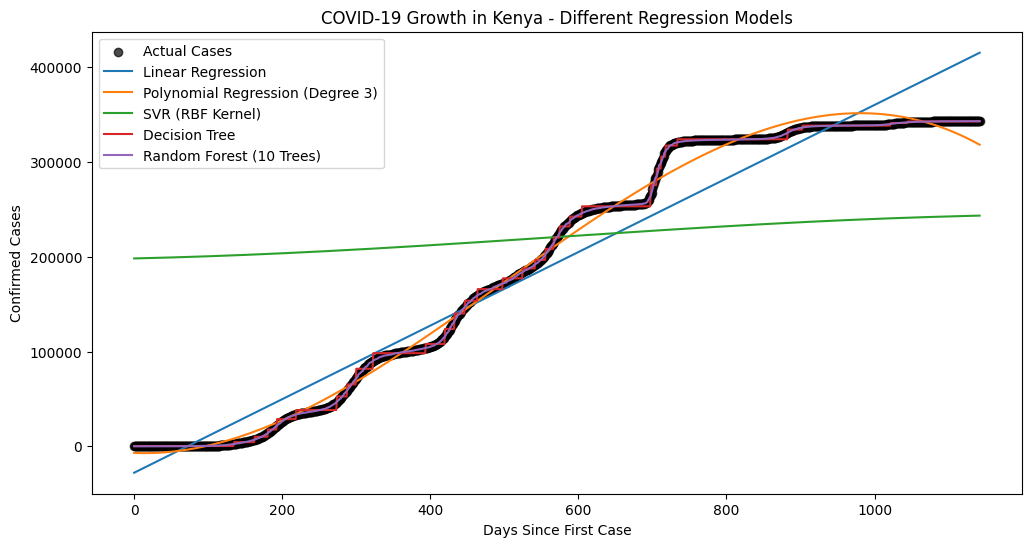

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(df_country["Days"], df_country["Confirmed"], color="black", label="Actual Cases", alpha=0.7)

for name, y_pred in predictions.items():
    plt.plot(df_country["Days"], y_pred, label=name)

plt.xlabel("Days Since First Case")
plt.ylabel("Confirmed Cases")
plt.title(f"COVID-19 Growth in {country} - Different Regression Models")
plt.legend()
plt.show()
